In [0]:
import pandas as pd
import numpy as np
import math
from math import cos, sin, pi
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/omdena/wfpdisrel/master/%23task1-datacollection/best_tracks/epac-atl.csv?token=ABS6ZVEX2B6ZVC7RSRIH27C6REI5Q')

### Shape function 


In [0]:
def dist_(x1,y1,x2,y2):
  return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

In [0]:
def shape_func(df, name, year, radius_col):
  def big_wind_plt(row):
    x1 = row['lat']
    x2 = row['lat_1']
    y1 = row['long']
    y2 = row['long_1']
    r1 =row[radius_col]
    r2 =row[radius_col+'_1']

    r1 /= 60
    r2 /= 60
    dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    if dist == 0 :
      return [0,0,0,0], [0,0,0,0]
    gamma = -np.arctan((y2-y1)/(x2-x1))
    beta = np.arcsin((r2-r1)/dist)
    alpha = gamma - beta

      # points (x3, y3) and (x4, y4)
    x3 = x1 + (r1 * cos( pi / 2 - alpha))
    y3 =  y1 + (r1 * sin( pi / 2 - alpha))
    x4 =  x2 + (r2 * cos( pi / 2 - alpha))
    y4 =  y2 + (r2 * sin( pi / 2 - alpha))

      # points (x5, y5) and (x6, y6)
    x5 = x1 - (r1 * cos( pi / 2 - alpha))
    y5 =  y1 - (r1 * sin( pi / 2 - alpha))
    x6 =  x2 - (r2 * cos( pi / 2 - alpha))
    y6 =  y2 - (r2 * sin( pi / 2 - alpha))

    return [[ y3, x3], [ y4, x4], [ y6,  x6],  [ y5, x5]]





  df_new=df[df['name']== name][df['year']== year]
  df_new[radius_col+'_dg']=df_new[radius_col]/60
  df_new = df_new.reset_index()
  df_new['long']  = - df_new['long'] 
  df_new['long_1'] = df_new.groupby(['name'])['long'].shift(-1)
  df_new['lat_1'] = df_new.groupby(['name'])['lat'].shift(-1)
  df_new[radius_col+'_1'] = df_new.groupby(['name'])[radius_col].shift(-1)
  df_new =df_new.reset_index()
  for index, row  in  df_new.iterrows():
    if row['lat'] ==row['lat_1']:
      try:
        df_new.drop(index+1, inplace=True)
      except:
        pass
    df_new = df_new.drop(['index'], axis=1)
    df_new =df_new.reset_index()



  initial_lat=df_new["lat"].iloc[-1]
  initial_long=df_new["long"].iloc[-1]
  initial_r=df_new[radius_col+'_dg'].iloc[-1]
  for i in range(len(df_new)):

      lat1= df_new.loc[i,'lat'] 
      long1= df_new.loc[i,'long']
      r1= df_new.loc[i,radius_col+'_dg']
     
      list_ = []
      for j in range(i+1,len(df_new)):
        lat2= df_new.loc[j,'lat'] 
        long2= df_new.loc[j,'long']
        #r2= df_new.loc[j,radius_col+'_dg']
        if dist_(-long2,lat2,-long1,lat1)<r1:
          df_new.loc[j,'lat'] = df_new.loc[i,'lat']

          df_new.loc[j,'long'] = df_new.loc[i,'long']

          df_new.loc[j,radius_col+'_dg'] = df_new.loc[i,radius_col+'_dg']
        
  df_new['long_1'] = df_new.groupby(['name'])['long'].shift(-1)
  df_new['lat_1'] = df_new.groupby(['name'])['lat'].shift(-1)
  df_new[radius_col+'_1'] = df_new.groupby(['name'])[radius_col].shift(-1)
  df_new = df_new.drop(['index'], axis=1)

  df_new =df_new.reset_index()
  df_new = df_new.drop(['level_0'], axis=1)
  for index, row  in  df_new.iterrows():
    if row['lat'] ==row['lat_1']:
      try:
        df_new.drop(index+1, inplace=True)
      except:
        pass
      
  
  df_new =df_new.reset_index()      

  df_new['long_1'] = df_new.groupby(['name'])['long'].shift(-1)
  df_new['lat_1'] = df_new.groupby(['name'])['lat'].shift(-1)
  df_new[radius_col+'_1'] = df_new.groupby(['name'])[radius_col].shift(-1)
  #df_new['shape'] = df_new.apply(big_wind_34, axis=1)
  df_new['shape_plt'+radius_col] = df_new.apply(big_wind_plt, axis=1)
  poly = np.array(df_new['shape_plt'+radius_col] )
  long =  np.array(df_new['long'])
  lat =  np.array(df_new['lat'])
  r =  np.array(df_new[radius_col])


  

  return poly, long, lat, r

### Produce DICT that has the shapes!

In [0]:
df

In [0]:
cyclones = df[['id','name','year']]

In [0]:
cyclones = cyclones.drop_duplicates()

In [0]:
cyclones.set_index('id')

,name,year
id,,
AL0188,ALBERTO,1988
AL0288,BERYL,1988
AL0388,CHRIS,1988
AL0488,DEBBY,1988
AL0588,ERNESTO,1988
...,...,...
EP2118,SERGIO,2018
EP2218,TARA,2018
EP2318,VINCENT,2018


In [0]:
cyclones

In [0]:
love = ['rmw','r_press','max_34','max_50',	'max_64']

shapes = {}
c={}
for i,cyclone in cyclones.iterrows():

  for radius in love:
    name = cyclone['name']
    year = cyclone['year']
    radius_col = radius
    shapes['name']=name
    shapes['year']=year
    shapes['shape_'+radius] = shape_func(df, name, year, radius_col)
    print(name, year)
    print (shape_func(df, name, year, radius_col))
  c[i]=shapes

In [0]:
c[21079]

###VIZ

In [0]:
poly_arr = np.array(shape_func(df, 'ADOLPH', 2001, 'max_34'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in arcsin
  app.launch_new_instance()


In [0]:
shape_func(df, 'ADOLPH', 2001, 'max_34')[1][0]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in arcsin
  app.launch_new_instance()


-101.1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in arcsin
  app.launch_new_instance()


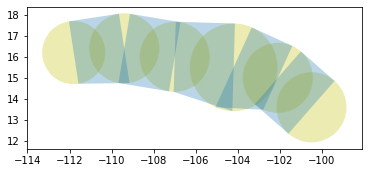

In [0]:
 
c1 = shape_func(df, 'ADOLPH', 2001, 'max_34')[1]
c2 = shape_func(df, 'ADOLPH', 2001, 'max_34')[2]
p__ = shape_func(df, 'ADOLPH', 2001, 'max_34')[0]
rmw = shape_func(df, 'ADOLPH', 2001, 'max_34')[3]
import matplotlib.pyplot as plt

plt.axes()




for i,j,rr in zip(c1,c2,rmw):
   plt.gca().add_patch( plt.Circle(( np.array(i),  np.array(j)),  np.array(rr)/60, fc='y',  alpha=0.3))
    
   

for i in p__:
    plt.gca().add_patch(plt.Polygon(np.array(i), alpha=0.3) )


plt.axis('scaled')
plt.show()